In [2]:
import numpy as np
from autograd import elementwise_grad
from autograd import numpy as anp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import fsolve
from scipy.interpolate import barycentric_interpolate

# River Crossing

## Problem 1
Assume that the current is given by $c(x) = -\frac{7}{10}(x^2-1)$. (This function assumes, for example, that the current is faster near the center of the river.)
Write a Python function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x,y(x),y'(x))$ (where $T[y] = \int_{-1}^1 L(x,y(x),y'(x))$). Use that function to define a second function that numerically computes $T[y]$ for a given path $y(x)$. 
(You can use `scipy.integrate.quad` to numerically evaluate the integral).

In [6]:
def L(x,y,dy):
    """Evaluates L(x,y,y') for the river crossing time functional."""
    c = -7/10 * (x**2 - 1)
    a = 1/np.sqrt(1 - c**2)
    return a*np.sqrt(1 + (a*dy(x))**2) - (a**2*c*dy(x))

def T(y):
    """Computes T[y] for the river crossing time functional"""
    dy = elementwise_grad(y)
    return quad(L, -1, 1, args=(y, dy))[0]

## Problem 2

Let $y(x)$ be the straight-line path between $A = (-1,0)$ and $B=(1,5)$. Numerically calculate $T[y]$ to get an upper bound on the minimum time required to cross from $A$ to $B$. Using (18.2), find a lower bound on the minimum time required to cross. (Hint: consider the minimum value of $sec(\theta)$)

In [7]:
y = lambda x: (5/2)*x + (5/2)
T(y)

3.8770820491384126

## Problem 3

Numerically solve the Euler-Lagrange equation for the river crossing problem, using $c(x) = -\frac{7}{10}(x^2-1)$ and $\alpha = (1-c^2)^{-1/2}$, and $y(-1) = 0$, $y(1) = 5$. 

Hint: Since this boundary value problem is defined over the doimain $[-1,1]$, it is easy to solve using the pseudospectral method. Begin by replacing each $\frac{d}{dx}$ with the pseudospectral differentiation matrix $D$. Then impose the boundary conditions and solve.

In [8]:
def cheb(N):
    """Returns the (N+1)x(N+1) cardinal function differentiation matrix D 
    and the N+1 Chebyshev nodes.
    """
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

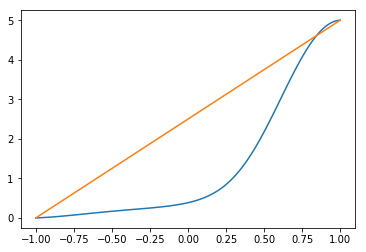

In [10]:
N = 20
D, x = cheb(N)
domain = np.linspace(-1, 1, 100)
c = -7/10 * (x**2 - 1)
a = 1/np.sqrt(1 - c**2)
def F(y):
    bc1 = y[0] - 5
    bc2 = y[-1]
    LHS = D@(a**3 * D@y * 1/np.sqrt(1 + (a*D@y)**2) - a**2*c)
    return np.hstack([bc1, LHS[1:-1], bc2])
guess = y(x)
sol = root(F, guess).x
Y = barycentric_interpolate(x, sol, domain)
plt.plot(domain, Y)
plt.plot(domain, y(domain))
plt.show()

## Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: Use Equation 18.1; see Figure 18.3. Note that the angle the boat should be steered is \emph{not} described by the tangent vector to the trajectory. You might consider using `scipy.optimize.root` to solve the nonlinear system.)

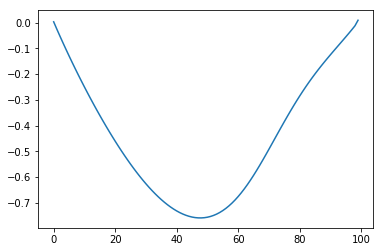

In [18]:
c = -7/10 * (domain**2 - 1)
def F(theta):
    return c/np.cos(theta) + np.tan(theta) - np.gradient(Y)
theta = root(F, np.ones(len(domain))).x
plt.plot(theta)

array([0.00337485, 0.00365609, 0.00420449, 0.00471966, 0.00519753,
       0.00563998, 0.00604714, 0.00641687, 0.00674627, 0.0070332 ,
       0.00727698, 0.00747838, 0.00763916, 0.00776158, 0.00784785,
       0.0079    , 0.00791977, 0.00790885, 0.00786908, 0.00780269,
       0.00771256, 0.00760227, 0.00747609, 0.00733887, 0.00719587,
       0.00705254, 0.00691427, 0.00678629, 0.00667349, 0.00658043,
       0.00651133, 0.0064702 , 0.0064609 , 0.00648738, 0.00655374,
       0.00666442, 0.00682433, 0.00703889, 0.00731415, 0.00765684,
       0.00807443, 0.00857524, 0.00916855, 0.00986473, 0.0106755 ,
       0.01161405, 0.01269535, 0.01393627, 0.01535577, 0.01697492,
       0.01881678, 0.02090616, 0.02326913, 0.02593227, 0.02892181,
       0.03226246, 0.03597608, 0.04008027, 0.04458682, 0.04950029,
       0.05481653, 0.0605216 , 0.06659077, 0.072988  , 0.07966579,
       0.08656543, 0.09361779, 0.10074442, 0.10785914, 0.11486986,
       0.12168068, 0.12819405, 0.13431295, 0.13994301, 0.14499